In [1]:
import albumentations as A
import cv2
from albumentations.pytorch.transforms import ToTensorV2
import matplotlib.pyplot as plt

In [2]:
# !pip3 uninstall albumentations -y
# !pip3 install -U albumentations

In [1]:
from PIL import Image
import os
import shutil
import numpy as np
# import cv2
import re
import pickle
import random
import time
# from tqdm import tqdm
import pandas as pd 
from glob import glob
from xml.etree.ElementTree import parse
# from pascal_voc_writer import Writer
import matplotlib.pyplot as plt

import os
import numpy as np 
import pandas as pd 
from datetime import datetime
import time
import random
from tqdm.auto import tqdm


#Torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler

#sklearn
from sklearn.model_selection import StratifiedKFold

#CV
import cv2

################# DETR FUCNTIONS FOR LOSS######################## 
import sys
sys.path.extend(['./detr/'])

from models.matcher import HungarianMatcher
from models.detr import SetCriterion
################################################################

#Albumenatations
import albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch.transforms import ToTensorV2

#Glob
from glob import glob

import sys
sys.path.extend(['./util/'])
from data_parser import *
from image_prepro import *
# from torchvision import transforms

from visualize import *


In [42]:
# src_path = '/home/beomgon/Object_Detection/Dataset'
# df = pd.DataFrame(columns=['label', 'org_label', 'bbox', 'xmin','ymin','xmax','ymax','width','height', 'file_name', 'path'])
# # df = pd.DataFrame(columns=['class','bbox', 'path'])
# data_list = []
# for dir_name in ['SS', 'SS2']:
#     dpath = os.path.join(src_path, dir_name)
# #     print(dpath)
#     dir_lists = os.listdir(dpath) 
# #     print(dir_lists)
    
#     for dir_list in dir_lists :
#         dpath2 = os.path.join(dpath, dir_list)
#         xml_list = [os.path.join(dpath2, d) for d in os.listdir(dpath2) if d.endswith(".xml")]
# #         print(xml_list)
#         for xml_path in xml_list :
#             parser = XMLParser(xml_path)
#             if (parser.height, parser.width) not in parser.rejection_size:  
#                 filename = parser.file_name
#                 for obj in parser.objects :
#     #                     obj_class = obj[0]
#     #                     if obj_class in rej_table :
#     #                         continue
#     #                     print(obj)
#                     img_path = '/'.join((xml_path.split('/')[:-1])) + '/' + filename
#     #                 img_path = re.sub('xml', 'jpg', xml_path)
#     # #                     print(img_path)
#                     obj.append(parser.width)
#                     obj.append(parser.height)
#                     obj.append(parser.file_name)
#                     obj.append(img_path)
#                     data_list.append(obj)
#     # #                     print(obj)


In [43]:
# df = pd.DataFrame(data_list,columns=['label', 'org_label', 'bbox', 'xmin','ymin','xmax','ymax','width','height', 'file_name', 'path'])
# df = df[['label', 'org_label', 'width','height', 'bbox', 'xmin','ymin','xmax','ymax', 'file_name', 'path']]
# # print(df.head())
# # df = df.reset_index(drop=True)
# # df.drop(columns = ['index'], inplace=True)
# df.reset_index(drop=True, inplace=True)
# df.head()

,label,org_label,width,height,bbox,xmin,ymin,xmax,ymax,file_name,path
0,Carcinoma,Suamous cell carcinoma,4032,1960,"[2061, 1051, 2178, 1175]",2061,1051,2178,1175,20200623_100015.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...
1,HSIL,HSIL,4032,1960,"[1945, 870, 2024, 941]",1945,870,2024,941,20200420_100401.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...
2,HSIL,HSIL,4032,1960,"[2400, 947, 2484, 1020]",2400,947,2484,1020,20200420_100401.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...
3,HSIL,HSIL,4032,1960,"[2209, 845, 2307, 912]",2209,845,2307,912,20200420_100401.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...
4,HSIL,HSIL,4032,1960,"[2056, 811, 2144, 866]",2056,811,2144,866,20200420_100401.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...


In [2]:
df = pd.read_csv('df.csv')
df.head()

,label,org_label,width,height,h,w,bbox,xmin,ymin,xmax,ymax,file_name,path
0,Carcinoma,Suamous cell carcinoma,4032,1960,4032,1960,"[2061, 1051, 2178, 1175]",2061,1051,2178,1175,20200623_100015.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...
1,HSIL,HSIL,4032,1960,4032,1960,"[1945, 870, 2024, 941]",1945,870,2024,941,20200420_100401.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...
2,HSIL,HSIL,4032,1960,4032,1960,"[2400, 947, 2484, 1020]",2400,947,2484,1020,20200420_100401.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...
3,HSIL,HSIL,4032,1960,4032,1960,"[2209, 845, 2307, 912]",2209,845,2307,912,20200420_100401.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...
4,HSIL,HSIL,4032,1960,4032,1960,"[2056, 811, 2144, 866]",2056,811,2144,866,20200420_100401.jpg,/home/beomgon/Object_Detection/Dataset/SS/06/2...


In [10]:
df[df['path'] == '/home/beomgon/Object_Detection/Dataset/SS/01/20200204_135914.jpg']

,label,org_label,width,height,bbox,xmin,ymin,xmax,ymax,file_name,path
41587,Carcinoma,Adenocarcinoma-endometrial type,4032,1960,"[2222, 931, 2311, 1036]",2222,931,2311,1036,20200204_135914.jpg,/home/beomgon/Object_Detection/Dataset/SS/01/2...
41588,Carcinoma,Adenocarcinoma-endometrial type,4032,1960,"[2139, 847, 2253, 936]",2139,847,2253,936,20200204_135914.jpg,/home/beomgon/Object_Detection/Dataset/SS/01/2...
41589,Carcinoma,Adenocarcinoma-endometrial type,4032,1960,"[2169, 756, 2281, 847]",2169,756,2281,847,20200204_135914.jpg,/home/beomgon/Object_Detection/Dataset/SS/01/2...
41590,Carcinoma,Adenocarcinoma-endometrial type,4032,1960,"[2128, 661, 2219, 739]",2128,661,2219,739,20200204_135914.jpg,/home/beomgon/Object_Detection/Dataset/SS/01/2...


In [3]:
path = '/home/beomgon/Object_Detection/Dataset/SS/01/20200204_135914.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.flip(image, 1)
print(image.shape)

(4032, 1960, 3)


In [4]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = list(map(int, bbox))
#     print(x_min, y_min, x_max, y_max)
#     x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    img = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
#     img = cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=color, thickness=thickness)
#     img = cv2.rectangle(img, (y_min, x_min), (y_max, x_max), color=color, thickness=thickness)
    
#     ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
#     cv2.rectangle(img, (y_min - int(1.3 * text_height), x_min ), (y_min, x_min + text_width ), BOX_COLOR, -1)
#     cv2.putText(
#         img,
#         text=class_name,
#         org=(x_min, y_min - int(0.3 * text_height)),
#         fontFace=cv2.FONT_HERSHEY_SIMPLEX,
#         fontScale=0.35, 
#         color=TEXT_COLOR, 
#         lineType=cv2.LINE_AA,
#     )
    return img

def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
#         print(class_name)
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img)


In [5]:
# my_df = df[df['path'] == '/home/beomgon/Object_Detection/Dataset/SS/04/20200513_104835.png'].copy()

In [6]:
# check_df = df[df['height']==1560].copy()
# check_df.reset_index(inplace=True)
# check_df.head()
# # len(check_df.unique)
# len(check_df['path'].unique())

(1560, 1632, 3)


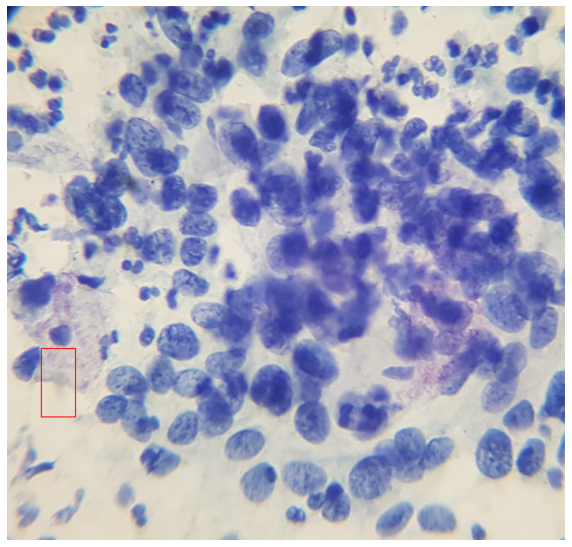

In [117]:
# path = '/home/beomgon/Object_Detection/Dataset/SS/01/20200204_135914.jpg'
# path = '/home/beomgon/Object_Detection/Dataset/SS/04/20200513_104835.png'
# path = 
# path = 
NUM = 220
# paths = ['/home/beomgon/Object_Detection/Dataset/SS2/02(200901-04)/20200903_101845(0).jpg',
#         '/home/beomgon/Object_Detection/Dataset/SS2/01(200806)/20200827_114543.jpg',
#         '/home/beomgon/Object_Detection/Dataset/SS/04/20200513_101512.png',
#         '/home/beomgon/Object_Detection/Dataset/SS/04/20200513_104253.png']
paths = ['/home/beomgon/Object_Detection/Dataset/SS/04/20200513_101512.png']
for path in paths :
    # path = check_df.loc[NUM, 'path']
#     print(df[df['path'] == path].width)
#     print(df[df['path'] == path].height)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.flip(image, 1)
    # image = np.transpose(image, (1, 0, 2))
    print(image.shape)
    my_df = df[df['path'] == path].copy()
    my_df.reset_index(inplace=True)
    new_bboxes = []
    for i in range(len(my_df)) :
        xmin, ymin, xmax, ymax = my_df.loc[i, 'xmin'], my_df.loc[i, 'ymin'], my_df.loc[i, 'xmax'], my_df.loc[i, 'ymax']
#         print(xmin, ymin, xmax, ymax)
        new_bboxes.append([xmin, ymin, xmax, ymax])
#         new_bboxes.append([ymin, xmin, ymax, xmax])
    category_ids = [0, 1, 1, 1]

    # We will use the mapping from category_id to the class name
    # to visualize the class label for the bounding box on the image
    category_id_to_name = {0: 'Carcinoma', 1: 'normal'}
    new_bboxes = [[100,1000,200,1200]]
    visualize(image, new_bboxes, category_ids, category_id_to_name)    
#     visualize(image, new_bboxes[:4], category_ids, category_id_to_name)
#     visualize(image, new_bboxes[4:8], category_ids, category_id_to_name)
#     visualize(image, new_bboxes[8:12], category_ids, category_id_to_name)
#     visualize(image, new_bboxes[12:16], category_ids, category_id_to_name)
#     visualize(image, new_bboxes[16:20], category_ids, category_id_to_name)
#     visualize(image, new_bboxes[20:24], category_ids, category_id_to_name)
#     visualize(image, new_bboxes[24:28], category_ids, category_id_to_name)
#     visualize(image, new_bboxes[28:32], category_ids, category_id_to_name)
#     visualize(image, new_bboxes[32:36], category_ids, category_id_to_name)

In [115]:
new_bboxes[5:8]

[[638, 547, 798, 666], [1068, 465, 1212, 587], [1286, 525, 1410, 654]]

In [98]:
new_bboxes[0:4]

[[326, 194, 416, 298],
 [402, 414, 506, 490],
 [449, 498, 526, 602],
 [524, 517, 620, 602]]

(4032, 1960, 3)


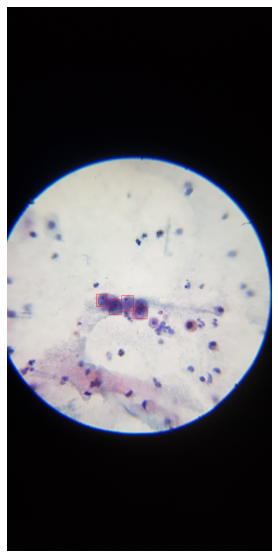

In [55]:
path = '/home/beomgon/Object_Detection/Dataset/SS/01/20200204_135914.jpg'
# path = '/home/beomgon/Object_Detection/Dataset/SS/04/20200513_104835.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.flip(image, 1)
print(image.shape)
my_df = df[df['path'] == '/home/beomgon/Object_Detection/Dataset/SS/01/20200204_135914.jpg'].copy()
my_df.reset_index(inplace=True)
new_bboxes = []
for i in range(len(my_df)) :
    xmin, ymin, xmax, ymax = my_df.loc[i, 'xmin'], my_df.loc[i, 'ymin'], my_df.loc[i, 'xmax'], my_df.loc[i, 'ymax']
#     new_bboxes.append([xmin, ymin, xmax, ymax])
    new_bboxes.append([ymin, xmin, ymax, xmax])
category_ids = [0, 1, 1, 1]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'Carcinoma', 1: 'normal'}
visualize(image, new_bboxes, category_ids, category_id_to_name)

(1560, 1632, 3)


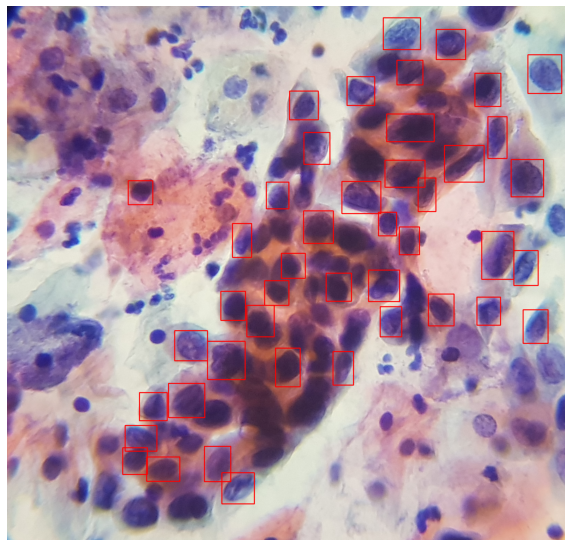

In [38]:
# path = '/home/beomgon/Object_Detection/Dataset/SS/01/20200204_135914.jpg'
path = '/home/beomgon/Object_Detection/Dataset/SS/04/20200513_104835.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.flip(image, 1)
print(image.shape)
my_df = df[df['path'] == '/home/beomgon/Object_Detection/Dataset/SS/04/20200513_104835.png'].copy()
my_df.reset_index(inplace=True)
new_bboxes = []
for i in range(len(my_df)) :
    xmin, ymin, xmax, ymax = my_df.loc[i, 'xmin'], my_df.loc[i, 'ymin'], my_df.loc[i, 'xmax'], my_df.loc[i, 'ymax']
    new_bboxes.append([xmin, ymin, xmax, ymax])
#     new_bboxes.append([ymin, xmin, ymax, xmax])
category_ids = [0, 1, 1, 1]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'Carcinoma', 1: 'normal'}
visualize(image, new_bboxes, category_ids, category_id_to_name, IsNormalize=False)

In [ ]:
#     width in albumentation is x asix, so ymax - xmax
# df = df[['label', 'org_label', 'width','height', 'bbox', 'ymin', 'xmin','ymax','xmax', 'file_name', 'path']]
# df.drop(columns=['bbox'], inplace=True)

df.head()

In [ ]:
import operator

width = []
height = []
xmax_list = list(df.xmax)
xmin_list = list(df.xmin.apply(lambda x : -1*x))
ymax_list = list(df.ymax)
ymin_list = list(df.ymin.apply(lambda x : -1*x))

height = list(map(operator.add, xmax_list, xmin_list))
width = list(map(operator.add, ymax_list, ymin_list))
df['box_width'] = width
df['box_height'] = height
df['x_min'] = list(df.ymin)
df['y_min'] = list(df.xmin)
df.drop(columns=['bbox', 'xmax', 'ymax', 'xmin', 'ymin'], inplace=True)
df.head()

In [24]:
print(image.shape)
transform = A.Compose([
#     A.RandomCrop(width=450, height=450),
#     A.HorizontalFlip(p=1),
    A.CenterCrop(1600,1600, True,1),
    A.RandomCrop(height=800, width=800, p=0.5),
    A.Resize(height=512, width=512, p=1),
    
    A.OneOf([
    A.HorizontalFlip(p=0.9),
    A.VerticalFlip(p=0.9),
    A.RandomRotate90(p=0.9),        
    ], p=1),
    A.GaussNoise(p=0.5),
#     A.OneOf([
#     A.OpticalDistortion(p=0.7),
#     A.GaussNoise(p=0.7)        
#     ], p=1),
#     A.RandomBrightnessContrast(p=0.2),
#     A.Normalize(max_pixel_value=1),
#     ToTensorV2(p=1.0),
#     A.pytorch.ToTensor(),
], p=1.0, bbox_params=A.BboxParams(format='pascal_voc', min_area=0, min_visibility=0, label_fields=['labels']))

(4032, 1960, 3)


In [29]:
transformed = transform(image=image, bboxes=new_bboxes, labels=labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['labels']

In [30]:
transformed.keys()

dict_keys(['image', 'bboxes', 'labels'])

In [31]:
# %matplotlib inline
# import matplotlib.pyplot as plt
print(transformed_bboxes)
print(transformed_class_labels)
# plt.figure(figsize=(10, 10))
# plt.imshow(transformed_image)

[(321.92, 238.39999999999998, 350.08, 271.68), (295.36, 270.4, 331.84, 298.56), (304.96, 298.88, 340.8, 327.68), (291.84, 333.12, 320.64, 358.08000000000004)]
['Carcinoma', 'Carcinoma', 'Carcinoma', 'Carcinoma']


In [32]:
test_list = [ 240.32, 321.92, 273.6, 350.08]
test_list = list(map(int, test_list))
test_list

[240, 321, 273, 350]

{0: 'Carcinoma', 1: 'normal'}
Carcinoma
normal
normal
normal
(512, 512, 3)


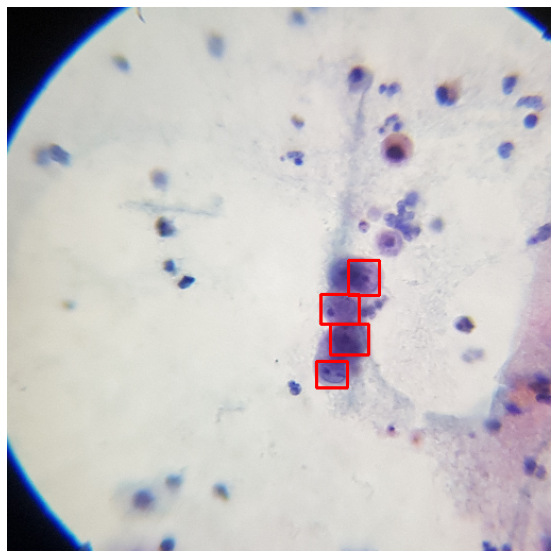

In [34]:
print(category_id_to_name)
visualize(transformed_image, transformed_bboxes, category_ids, category_id_to_name)
print(transformed_image.shape)